In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

from ggplot import *
from scipy.stats import logistic
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC, SVR

# Lec 6 이어서
## Bernoulli NB

In [14]:
# Bernoulli NB

np.random.seed(1234)
X=np.random.randint(2,size=(500,10))
y=np.random.randint(2,size=(500,1))
X_train=X[:450,:]
X_test=X[450:,:]
y_train=y[:450,:]
y_test=y[450:,:]

In [15]:
clf1=BernoulliNB().fit(X_train,y_train)
clf1

BernoulliNB()

In [16]:
clf2=BernoulliNB()
result2=clf2.fit(X_train,y_train)
result2

BernoulliNB()

In [17]:
pred1=clf1.predict(X_test)
pred1

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1])

In [18]:
pred2=result2.predict(X_test)
pred2

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1])

In [19]:
confusion_matrix(y_test,pred1)

array([[ 4, 21],
       [ 3, 22]], dtype=int64)

In [20]:
confusion_matrix(y_test,pred2)

array([[ 4, 21],
       [ 3, 22]], dtype=int64)

In [21]:
pd.value_counts('y_Test')

y_Test    6
dtype: int64

In [22]:
# CCR
(22+4)/(22+4+21+3)

0.52

## Laplce smoothing

In [25]:
# Laplace Smoothing
clf3=BernoulliNB(alpha=1)
result3=clf3.fit(X_train,y_train)
result3

BernoulliNB(alpha=1)

In [26]:
pred3=result3.predict(X_test)
confusion_matrix(y_test,pred3)

array([[ 4, 21],
       [ 3, 22]], dtype=int64)

In [27]:
# Laplce smoothing q별 쓸모 없음

## Multinomial NB

In [28]:
# Multinomial NB
file1="c:/temp/multi_nb.csv"
data1=pd.read_csv(file1)
data1

,y,x1,x2
0,Yes,2,1
1,No,1,2
2,No,1,3
3,Yes,2,1
4,No,0,1
...,...,...,...
495,Yes,4,2
496,No,1,1
497,No,2,3
498,Yes,3,1


In [30]:
# train test split 해보자
X=data1[['x1','x2']]
y=data1['y']
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=0)
clf4=MultinomialNB()
result4=clf4.fit(X_train,y_train)
result4

MultinomialNB()

In [31]:
pred4=result4.predict(X_test)
confusion_matrix(y_test,pred4)

array([[22, 41],
       [ 2, 85]], dtype=int64)

In [32]:
# CCR ; train test split
(22+85)/(22+85+41+2)

0.7133333333333334

In [33]:
# 전체로 해보자
clf5=MultinomialNB().fit(X,y)
pred5=clf5.predict(X)
confusion_matrix(y,pred5)

array([[ 72, 131],
       [ 10, 287]], dtype=int64)

In [34]:
# CCR : 전체
(72+287)/500

0.718

In [35]:
y_test

90      No
254    Yes
283    Yes
445    Yes
461     No
      ... 
4       No
318    Yes
331    Yes
245    Yes
5      Yes
Name: y, Length: 150, dtype: object

In [36]:
22+85+41+2

150

# Lec 7 CART Classification and Regression Tree

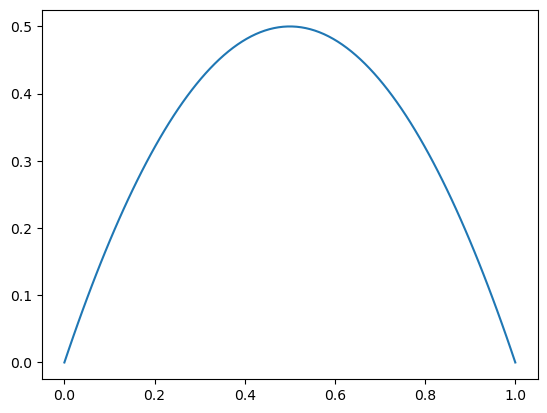

In [38]:
# gini index 그리기

x=np.linspace(0,1,100)
y=1-(x**2+(1-x)**2)
plt.plot(x,y)
plt.show()

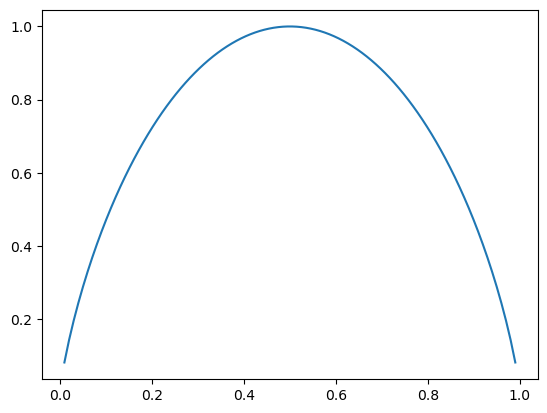

In [39]:
# Entropy
x=np.linspace(0,1,100)
y=-x*np.log2(x)-(1-x)*np.log2(1-x)
plt.plot(x,y)
plt.show()